# Multiple Linear Regression

Multiple Linear Regression is a type of Linear Regression when the input has more than one independent variables (features).

Similar to Simple Linear Regression, we have input variable $(X)$ and output variable $(Y)$. But the input variable has $n$ features. Therefore, we can represent this linear model as follows;

$$ Y = \beta_{0}x_{0} +  \beta_{1} x_{1} + \beta_{2} x_{2}+...+ \beta_{n} x_{n},$$

where $x_{0}=1$, so that the equation can be written in matrix form as:

$$Y = \beta^{T}X,$$

with $\beta = [\beta_{0}, \beta_{1}, ..., \beta_{n}]^{T}$ and $X = [x_{0}, x_{1}, ..., x_{n}]^{T}$, here $\beta$ are the weights of coefficients of the variables $x$.

We now define the error function the error in our model, this function basically tells us how our model is performing. To do this, we first need to define our hypothesis, we is simply $Y$:

$$h_{\beta}(x)= \beta^{T}x$$

Our error or cost function can then be defined as:
$$E(\beta) = \frac{1}{2n} \sum_{i=1}^{i=n}(h_{\beta}(x^{(i)}) - y^{(i)})^2$$

Our aim is to minimize this error function to find the values of $\beta$ that gives the lowest value possible for $E$. To do this, we employ the gradient descent algorithm.

### Descent Descent

Gradient Descent is an optimization algorithm. We will optimize our cost function using Gradient Descent Algorithm. The steps in this algorithm are as follows:


**Step 1** initialize $\beta$ with some random values.\
**Step 2** iteratively update $\beta$ with: $\beta_{j} = \beta_{j} - \alpha \frac{\partial}{\partial \beta_{j}}E(\beta)$, until $\beta$ doesn't change anymore. Here, $\alpha$ is the learning rate which allows us to gradually vary $\beta$.

After computing the partial derivative of the error function with respect to the weights, $\frac{\partial}{\partial \beta_{j}}E(\beta)$, step 2 becomes: \
$$\beta_{j} = \beta_{j} - \alpha \frac{1}{n} \sum_{i=1}^{i=n}(h_{\beta}(x^{(i)}) - y^{(i)})x^{(i)}_{j}$$

Now let's write a class

In [68]:
class LinReg2():
    """ Multiple Linear regression class for calculating the
    coefficients of a data set.
    Attributes: intercept_   
    Methods: fit, predict, score
    """
    
    def __init__(self):
        self.B = []
        
    
    def fit(self,X, Y, alpha=0.01, iterations=100000):
        
        """Function to calculate the coefficients of a data set.
        Args: X, Y, alpha: learning rate, iterations
        Returns: None
        """
        import numpy as np
        m = len(Y)
        self.B = np.zeros(X.shape[1])
        for iteration in range(iterations):
            # Hypothesis Values
            h = X.dot(self.B)
            # Difference b/w Hypothesis and Actual Y
            loss = h - Y
            # Gradient Calculation
            gradient = X.T.dot(loss) / m
            # Changing Values of B using Gradient
            self.B = self.B - alpha * gradient
            

    def predict(self, X):
        """Function to predict target given label.
        Args: X
        Returns Y """
        Y = X.dot(self.B)
        return Y
        
    def score(self, X, Y):
        """Function to calculate the R^2 score.
        Args: X, Y
        Returns: r2
        """
        import numpy as np
        Y_pred = self.predict(X)
        ssr = np.sum((Y - Y_pred)**2)
        sst = np.sum((Y - Y.mean())**2)
        r2 = 1 - ssr/sst
        return r2
        

In [7]:
import pandas as pd
data = pd.read_csv('exams.csv')

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,high school,standard,completed,53,64,68
1,female,group A,high school,standard,none,54,67,60
2,female,group A,master's degree,free/reduced,none,52,61,60
3,female,group D,high school,free/reduced,completed,40,50,57
4,female,group C,bachelor's degree,standard,none,67,70,63


In [10]:
math = data['math score'].values
read = data['reading score'].values
write = data['writing score'].values

let's plot this data to see how the variables are related

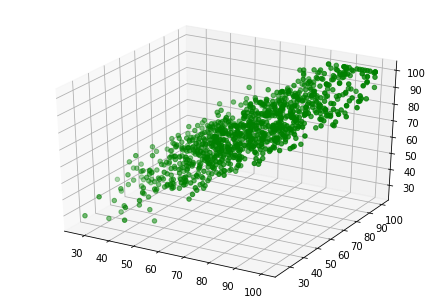

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='g')

plt.show()

In [20]:
# X and Y Values
import numpy as np
X = np.array([math, read]).T
Y = np.array(write)

m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
Y = np.array(write)
alpha = 0.0001

In [56]:
model1 = LinReg2()

In [57]:
model1.fit(X,Y,alpha=alpha)

In [58]:
model1.B

array([0.06423893, 0.92618465])

In [59]:
Y_pred = model1.predict(X)

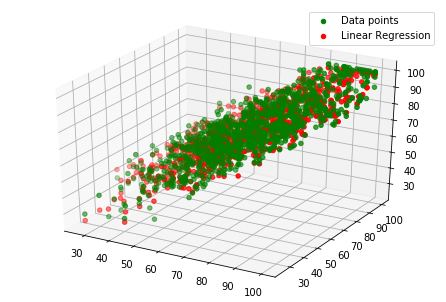

In [67]:
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='g', label='Data points')
ax.scatter(math, read, Y_pred, color='r', label='Linear Regression')
plt.legend()
plt.show()

In [61]:
print("R^2 score=", model1.score(X, Y))

R^2 score= 0.907830241315995


Now let's compare this with the sklearn module

In [52]:
from sklearn.linear_model import LinearRegression

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()

# Data Fitting
reg = reg.fit(X, Y)

# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
r2 = reg.score(X, Y)

print("R^2 score=", r2)

R^2 score= 0.9078311210740997


In [54]:
print(reg.coef_)
print(reg.intercept_)

[0.06394944 0.92549831]
0.07045360581767568


And there it is, the accuracy in both cases are the same